In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = pd.read_csv('SP500_train.csv')
test = pd.read_csv('SP500_test.csv')

In [3]:
train.head()

,date,open,high,low,close,adj_close,volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [4]:
train.shape

(1258, 7)

In [5]:
train_df = train.iloc[:, 5:6].values
test_df = test.iloc[:, 5:6].values

In [6]:
minmax = MinMaxScaler()
scaled_train = minmax.fit_transform(train_df)

In [7]:
scaled_train.shape

(1258, 1)

In [8]:
n = len(scaled_train)

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(40, n):
    x_train.append(scaled_train[i - 40 : i, 0])
    y_train.append(scaled_train[i, 0])

In [11]:
x_train[0]

array([0.        , 0.00024128, 0.00402148, 0.00075403, 0.00365943,
       0.01510054, 0.01550271, 0.01853894, 0.01209449, 0.01669916,
       0.0311463 , 0.03764095, 0.03852568, 0.039149  , 0.03779178,
       0.04926307, 0.0415921 , 0.03948073, 0.03614296, 0.03553976,
       0.0472824 , 0.04874026, 0.06820418, 0.06763105, 0.07036575,
       0.07329128, 0.07529196, 0.06593204, 0.07511106, 0.07383422,
       0.06652517, 0.08141474, 0.08462181, 0.08560705, 0.0810327 ,
       0.08686376, 0.08915603, 0.09101594, 0.09563067, 0.08909577])

In [13]:
y_train[0]

0.09755083705434409

In [14]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [15]:
x_train.shape

(1218, 40)

In [16]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [17]:
x_train.shape

(1218, 40, 1)

In [18]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout (0.5))
model.add(LSTM(units = 25, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(units = 25))
model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 25)            7600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 25)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 23,126
Trainable params: 23,126
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs = 100, batch_size=32)

Epoch 1/100
1218/1218 [==============================] - 16s 13ms/step - loss: 0.0673
Epoch 2/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0061
Epoch 3/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 4/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0038
Epoch 5/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0036
Epoch 6/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0031
Epoch 7/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0031
Epoch 8/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0029
Epoch 9/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0028
Epoch 10/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0027
Epoch 11/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0029
Epoch 12/100
1218/1218 [==============================] - 3s 2ms/step - 

1218/1218 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 98/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 99/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 100/100
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0011


In [21]:
model.history.history

{'loss': [0.06726443535710987,
  0.006129732516048284,
  0.004275339903319117,
  0.003783543014972301,
  0.003554797549930834,
  0.0031121893845535266,
  0.0031152211549448704,
  0.0029347839601619294,
  0.002843383617839839,
  0.0027283084309661426,
  0.0029480821240467,
  0.0025814452926568652,
  0.002678488744980975,
  0.0024623760283727365,
  0.002418512579402313,
  0.0024537940177766756,
  0.0024823457467536424,
  0.0026423903247142708,
  0.002463747251569332,
  0.0022719599847943325,
  0.0019633774022450932,
  0.001981536899073958,
  0.002061031390614624,
  0.0021708652132254994,
  0.0021714391715385705,
  0.0023533135082126153,
  0.001991185011175478,
  0.001894802765764773,
  0.0020733303975387306,
  0.0017758058869602597,
  0.0016777355838754353,
  0.0016957752212380442,
  0.0018490556679506998,
  0.0022237136323855233,
  0.0017922609375999271,
  0.0018268376581175084,
  0.0018221075194585787,
  0.001813761090128782,
  0.0017407850687042618,
  0.0017423916928571831,
  0.001588

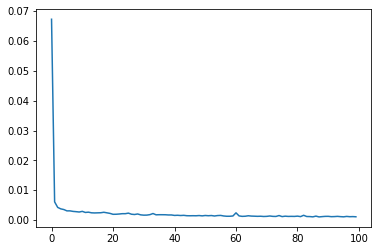

In [23]:
x_axis = [i for i in range(100)]
plt.plot(x_axis, model.history.history['loss'])

In [24]:
train.tail()

,date,open,high,low,close,adj_close,volume
1253,2016-12-23,2260.250000,2263.790039,2258.840088,2263.790039,2263.790039,2020550000
1254,2016-12-27,2266.229980,2273.820068,2266.149902,2268.879883,2268.879883,1987080000
1255,2016-12-28,2270.229980,2271.310059,2249.110107,2249.919922,2249.919922,2392360000
1256,2016-12-29,2249.500000,2254.510010,2244.560059,2249.260010,2249.260010,2336370000
1257,2016-12-30,2251.610107,2253.580078,2233.620117,2238.830078,2238.830078,2670900000


In [26]:
x_train[-1:-40:-1].shape

(39, 40, 1)

In [28]:
model.predict(x_train[-1].reshape((1,40,1)))

array([[0.9813145]], dtype=float32)